In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('Student_Performance.csv')

In [3]:
data.shape

(10000, 6)

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
Previous_Performance=[[data["Previous Scores"].sum(axis=0), data["Performance Index"].sum(axis=0)]]

In [9]:
Previous_Performance=pd.DataFrame(Previous_Performance, columns=["Previous Scores", "Performance Index"])

In [10]:
Previous_Performance

,Previous Scores,Performance Index
0,694457,552248.0


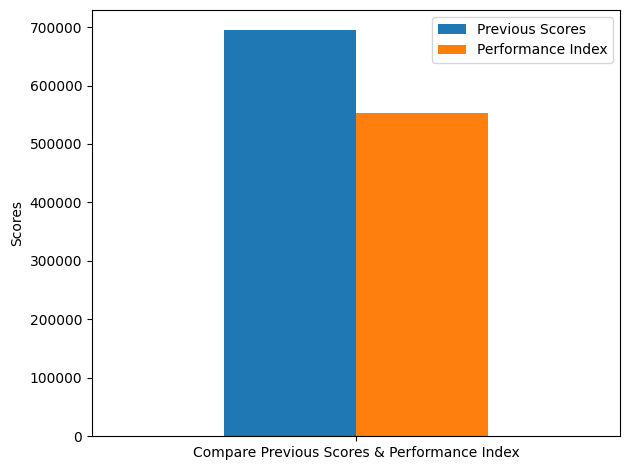

In [11]:
ax = Previous_Performance.plot(kind="bar", legend=True)

ax.set_xticks([0])
ax.set_xticklabels(["Compare Previous Scores & Performance Index"])

plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Scores")
plt.tight_layout()
plt.show()


 We will compare the Previous Scores with the Performance Index to categorize the students into these three groups:**

> 1. Students whose scores have increased.
> 2. Students whose scores have decreased.
> 3. Students whose scores have remained the same.

> 1. **Students whose scores have increased.**

In [12]:
filter1 = data[(data["Performance Index"] > data["Previous Scores"])]
filter1.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
61,9,97,Yes,8,5,98.0
130,9,76,No,8,2,77.0
145,9,98,Yes,7,7,100.0
277,9,72,No,7,1,73.0
424,9,50,Yes,9,9,51.0


> 2. **Students whose scores have decreased.**

In [13]:
filter2 = data[(data["Performance Index"] < data["Previous Scores"])]
filter2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


> 3. **Students whose scores have remained the same.**

In [14]:
filter3 = data[(data["Performance Index"] == data["Previous Scores"])]
filter3.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
107,9,83,Yes,8,7,83.0
121,9,92,Yes,8,0,92.0
236,9,56,Yes,8,2,56.0
531,9,74,Yes,8,6,74.0
539,9,58,No,6,4,58.0


>

In [15]:
Student_performance = {'Category': ['Students whose grades rose', 'Students whose grades dropped', 'Students whose grades have not changed'],
                       'Values': [filter1.shape[0], filter2.shape[0], filter3.shape[0]]}

Student_performance = pd.DataFrame(Student_performance)
Student_performance.set_index("Category", inplace=True)
Student_performance

,Values
Category,
Students whose grades rose,101
Students whose grades dropped,9800
Students whose grades have not changed,99


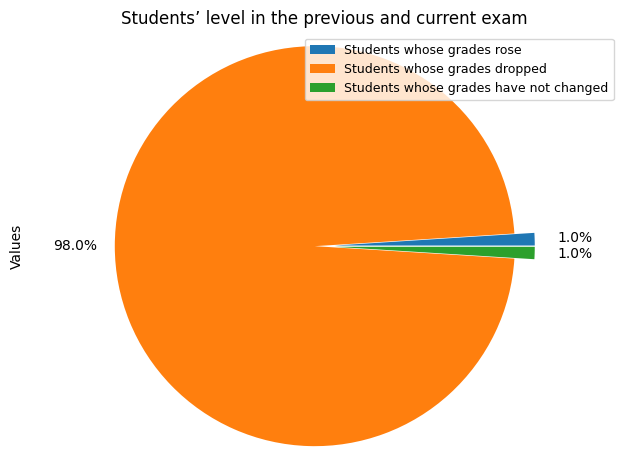

In [16]:
explode_list = [0.1, 0, 0.1]
Student_performance["Values"].plot(kind="pie",autopct='%1.1f%%',
                             pctdistance=1.2,labels=None, explode=explode_list)
plt.title('Students’ level in the previous and current exam')
plt.axis('equal')
plt.legend(labels=Student_performance.index, loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()

In [17]:
stat_filters = pd.DataFrame({
    "Hours Studied": [filter1["Hours Studied"].mean(),
                           filter3["Hours Studied"].mean(),
                           filter2["Hours Studied"].mean()],
    "Previous Scores": [filter1["Previous Scores"].mean(),
                              filter3["Previous Scores"].mean(),
                             filter2["Previous Scores"].mean()],

    "Sleep Hours": [filter1["Sleep Hours"].mean(),
                         filter3["Sleep Hours"].mean(),
                        filter2["Sleep Hours"].mean()],
    "Sample Question Papers Practiced": [filter1["Sample Question Papers Practiced"].mean(),
                                              filter3["Sample Question Papers Practiced"].mean(),
                                             filter2["Sample Question Papers Practiced"].mean()],
    "Performance Index": [filter1["Performance Index"].mean(),
                               filter3["Performance Index"].mean(),
                              filter2["Performance Index"].mean()]
})
index=["Students whose grades rose",  "Students whose grades have not changed", "Students whose grades dropped"]
stat_filters.index = index
stat_filters = stat_filters.transpose()
stat_filters

,Students whose grades rose,Students whose grades have not changed,Students whose grades dropped
Hours Studied,8.960396,8.929293,4.912245
Previous Scores,72.297030,71.424242,69.396327
Sleep Hours,7.683168,7.515152,6.508776
Sample Question Papers Practiced,6.029703,5.444444,4.559694
Performance Index,73.960396,71.424242,54.868061


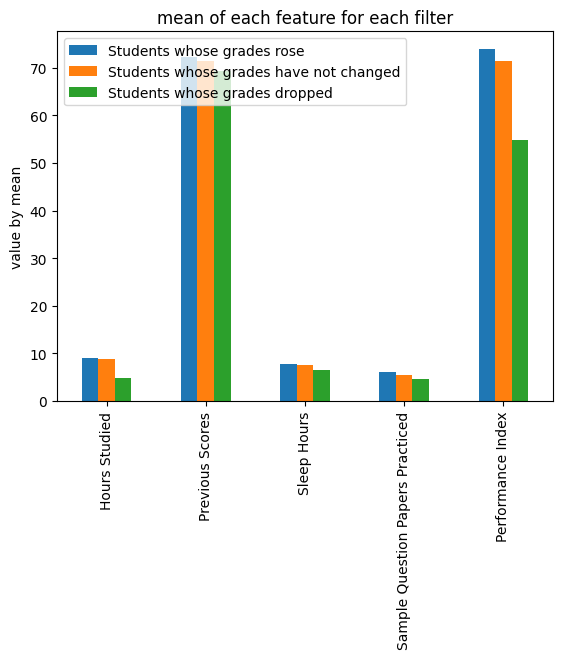

In [18]:
stat_filters.plot(kind="bar")
plt.title("mean of each feature for each filter")
plt.ylabel("value by mean")
plt.show()

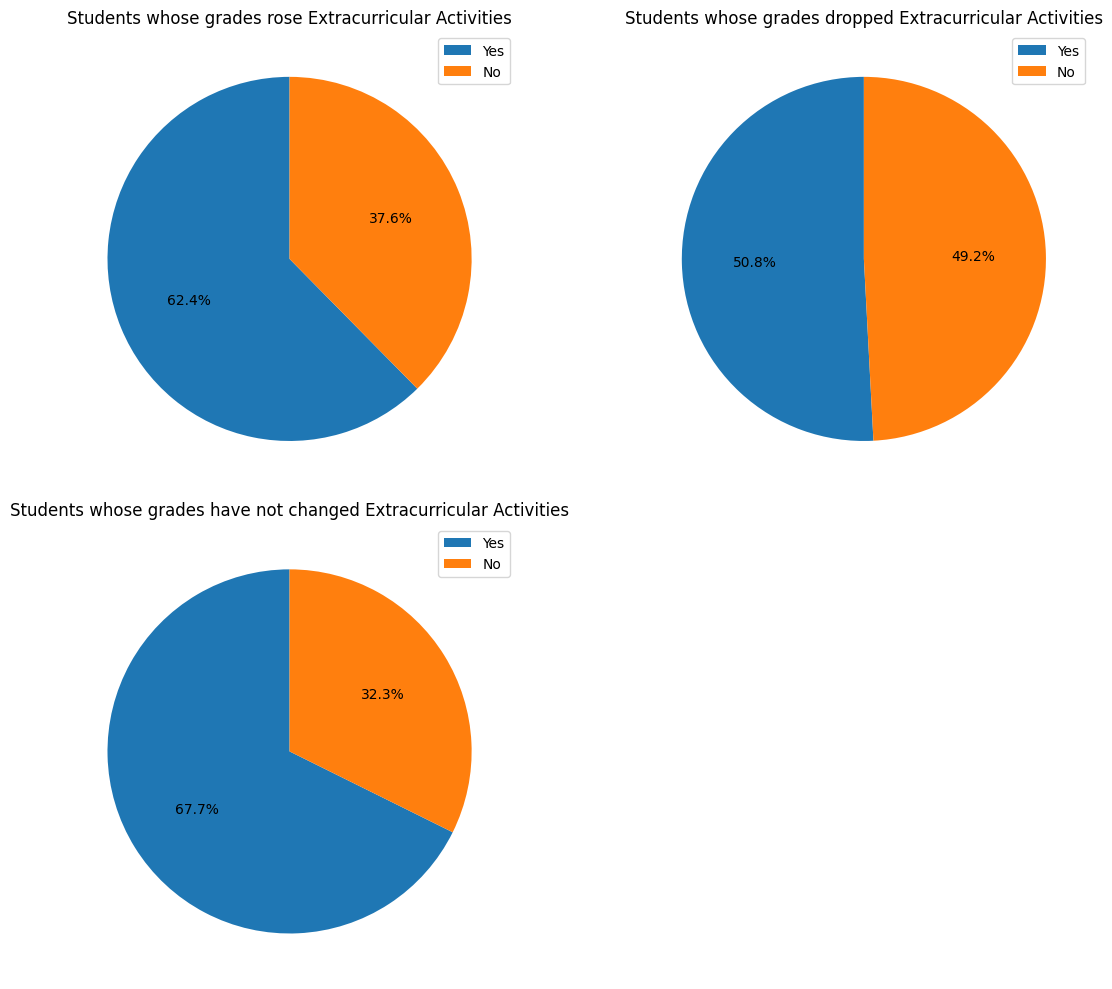

In [19]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

axes[0, 0].pie((filter1["Extracurricular Activities"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[0, 0].set_title('Students whose grades rose Extracurricular Activities')
axes[0, 0].legend(labels = filter1["Extracurricular Activities"].unique(), loc="upper right")

axes[0, 1].pie((filter2["Extracurricular Activities"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[0, 1].set_title('Students whose grades dropped Extracurricular Activities')
axes[0, 1].legend(labels = filter2["Extracurricular Activities"].unique(), loc="upper right")

axes[1, 0].pie((filter3["Extracurricular Activities"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[1, 0].set_title('Students whose grades have not changed Extracurricular Activities')
axes[1, 0].legend(labels = filter3["Extracurricular Activities"].unique(), loc="upper right")

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

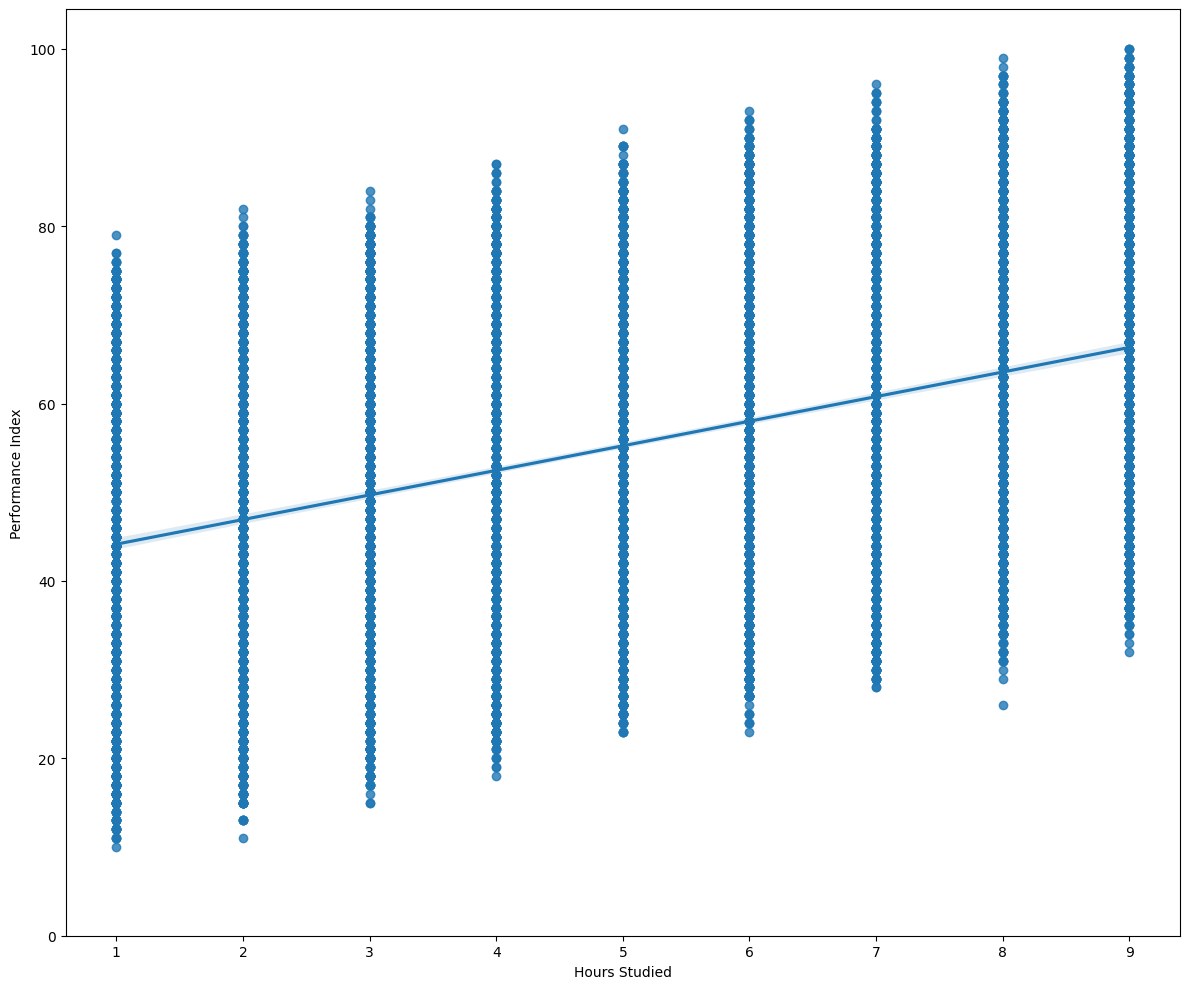

In [20]:
plt.figure(figsize = (12, 10))
sns.regplot(x = "Hours Studied", y = "Performance Index", data = data)
plt.ylim(0,)
plt.tight_layout()
plt.show()

> **Similarly, Previous Scores also show a positive correlation with the target variable (Performance Index). As the previous scores increase, the Performance Index tends to rise as well, suggesting that students with higher previous scores generally perform better in the current exam.**

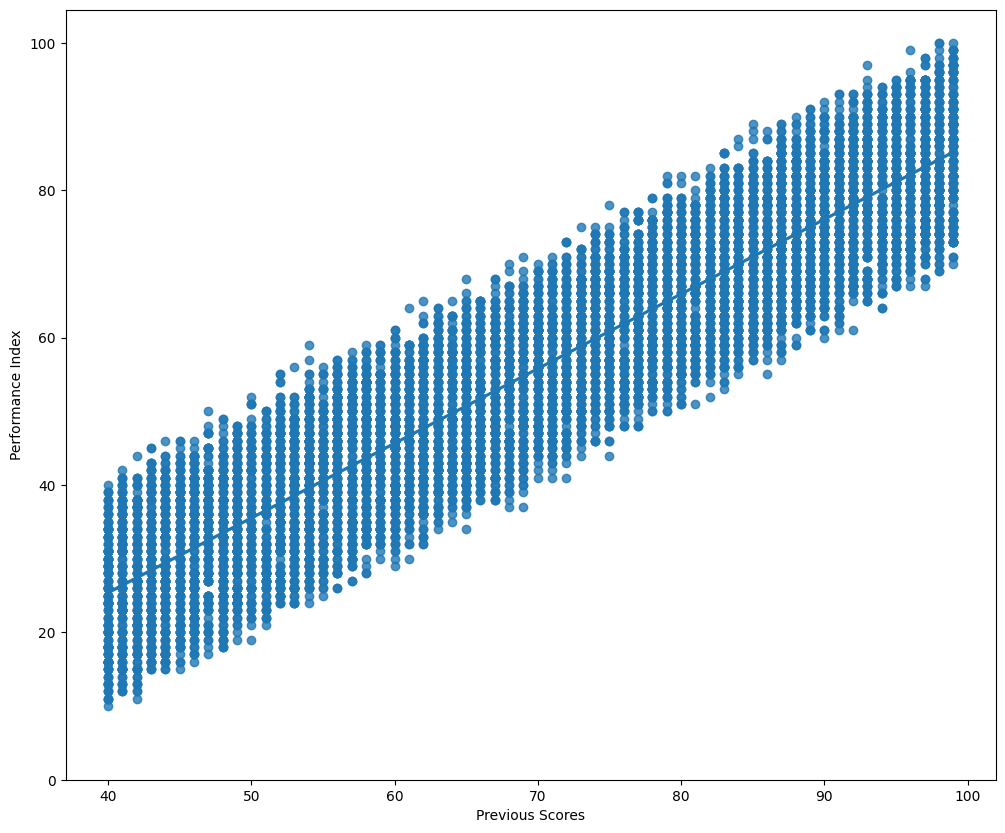

In [21]:
plt.figure(figsize = (12, 10))
sns.regplot(x = "Previous Scores", y = "Performance Index", data = data)
plt.ylim(0,)
plt.show()

> **In the Sleep Hours feature, it appears that the correlation with the target variable (Performance Index) is very weak, almost non-existent. This suggests that the amount of sleep does not have a strong influence on the students' performance in the current exam.**

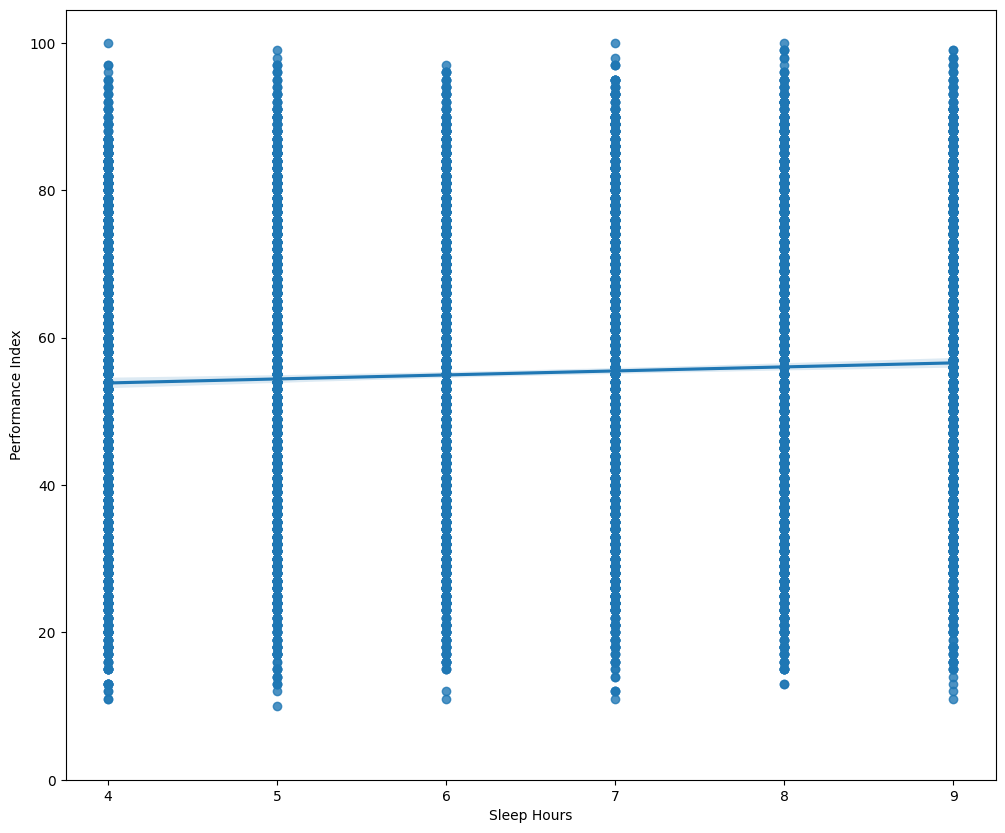

In [22]:
plt.figure(figsize = (12, 10))
sns.regplot(x = "Sleep Hours", y = "Performance Index", data = data)
plt.ylim(0,)
plt.show()

> **In the Sample Question Papers Practiced feature, it appears that the correlation with the target variable (Performance Index) is very weak, almost non-existent.**

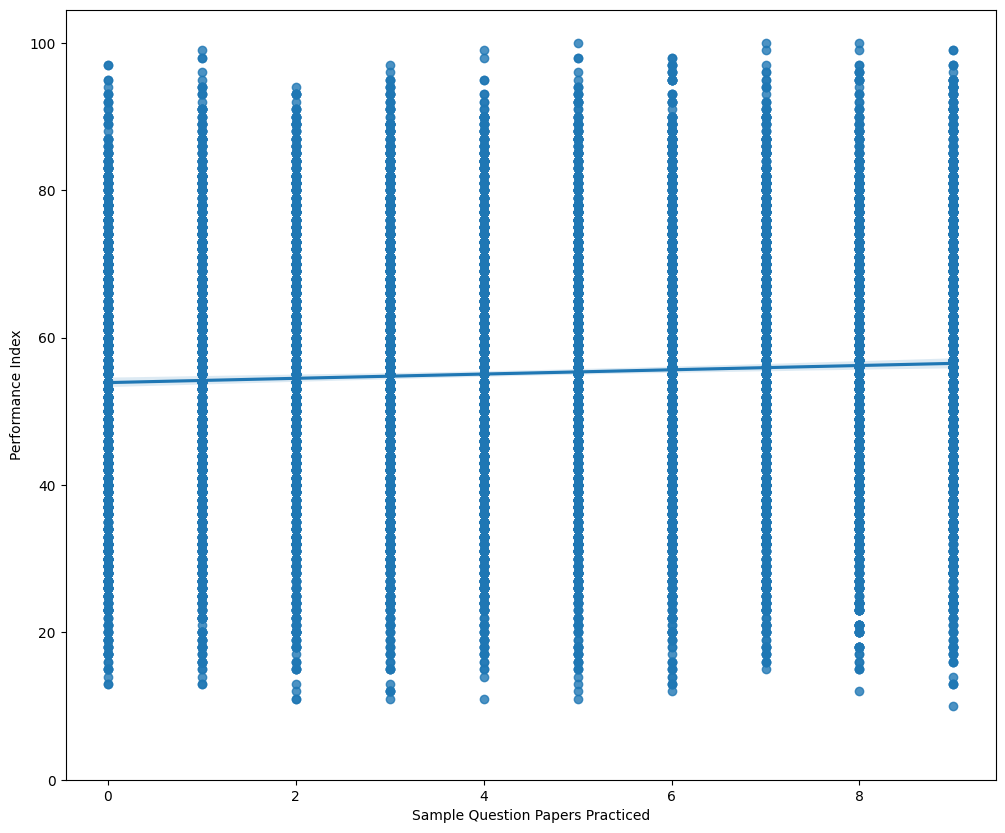

In [23]:
plt.figure(figsize = (12, 10))
sns.regplot(x = "Sample Question Papers Practiced", y = "Performance Index", data = data)
plt.ylim(0,)
plt.show()

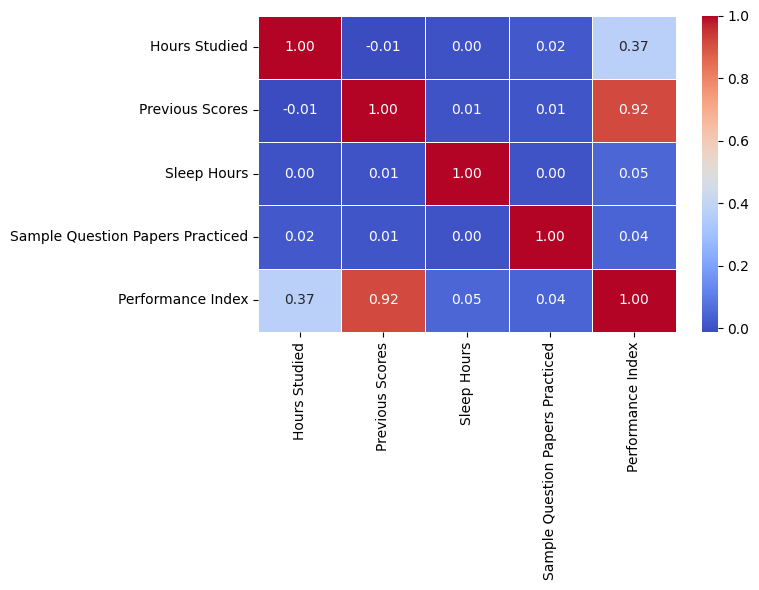

In [24]:
corr_data = data.drop("Extracurricular Activities", axis = 1)
correl = corr_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correl, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.show()

>

Using P values fo co relation:

Let’s use the p-value to determine whether the relationship between each feature and the target variable (Performance Index) is statistically significant. This will help us understand if the observed correlations are the result of chance or represent meaningful relationships.

> A low p-value (typically less than 0.05) indicates that the correlation is statistically significant
A high p-value (greater than 0.05) suggests that the correlation is not statistically significant

> After displaying the results of the p-values, we notice that the values for all columns are smaller than 0.05. This indicates that the relationship between the columns and the target variable (Performance Index) is statistically significant and not the result of chance.
However, despite the statistical significance, the correlation for most of these columns is nearly negligible, meaning that while the relationships are not random, they may have little to no practical impact on the target variable.



In [25]:
for i in corr_data.columns.tolist():
    print(i)
    correlation, p_value = stats.pearsonr(corr_data[i], corr_data['Performance Index'])
    print(f"correlation = {correlation}, p_value = {p_value}")

Hours Studied
correlation = 0.3737303506987237, p_value = 0.0
Previous Scores
correlation = 0.9151891412264479, p_value = 0.0
Sleep Hours
correlation = 0.04810583543435261, p_value = 1.4885369617939595e-06
Sample Question Papers Practiced
correlation = 0.04326832665907979, p_value = 1.5025193128408894e-05
Performance Index
correlation = 0.9999999999999983, p_value = 0.0


> After displaying the results of the correlation and p-value, it becomes clear that the most impactful columns are Previous Scores and Hours Studied, and these should be selected for modeling to predict the target (Performance Index).

> Even if we were to include all the columns in the models it wouldnt have helped us with the accuracy. Since the relationship between most features and the target variable is either very weak or nonexistent, their inclusion would not significantly impact the model's accuracy. This is because these features do not play a meaningful role in predicting the target variable in the first place.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

> **To define the independent data, we will select all columns except for the target variable (Performance Index).**

In [47]:
X = data.drop("Performance Index", axis = 1)
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


> **Now, we will define the dependent data (target variable)**

In [48]:
y = data["Performance Index"]
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


> **After that, we will split the data into training and testing sets. The testing set will take 20% of the data, while the remaining 80% will be used for training the model.**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## To preprocess the data, we will:

Convert the categorical (non-numeric) features (like Extracurricular Activities) into binary values (0 or 1). This can be done by applying encoding techniques such as Label Encoding or One-Hot Encoding. In this case, we can use Label Encoding for binary features.

Scale the numerical features (like Hours Studied, Previous Scores, etc.) so that all values are in a similar range, typically between 0 and 1. This ensures that no feature dominates the others due to its scale. We will use Min-Max Scaling for this purpose.

In [49]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

## Modeling with Multiple Linear Regression (MLR)

What is a Pipeline?
A Pipeline in machine learning is a way to streamline the process of applying a series of transformations and models in a structured way. It ensures that all the preprocessing steps (like scaling or encoding) and the model are applied in sequence, and it simplifies the process of training, evaluation, and prediction.

In [31]:

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns),
        ('scale', StandardScaler(), numerical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [32]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  Index(['Extracurricular Activities'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object'))])),
                ('model', LinearRegression())])

> **Predict test data**

In [33]:
yhat_mlr = pipeline.predict(x_test)

## Model Evaluation (MLR)  

> **We can observe from the plot that the predicted values and the actual values are very close to each other, indicating that the model's performance is excellent.**

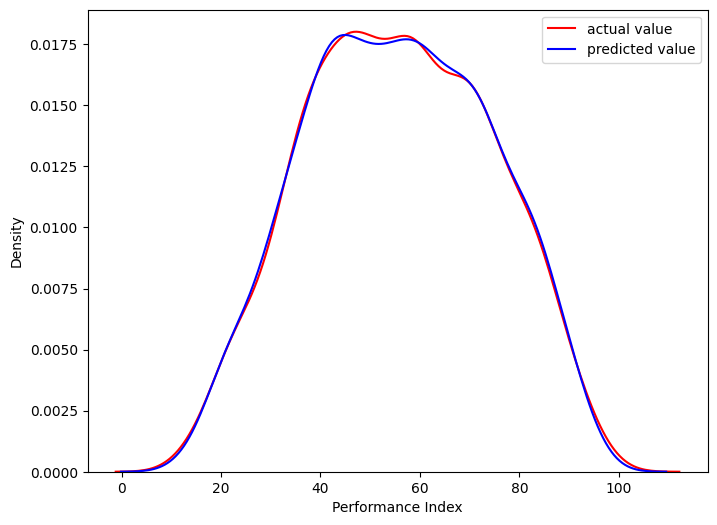

In [34]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_mlr, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

> **We will also calculate the Mean Error and R-squared (R²) to evaluate the model. We noticed that the R² value is 0.988, which is very close to 1, indicating that the model explains 98.8% of the variance in the data, which is excellent performance.**

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_mlr = mean_squared_error(y_test, yhat_mlr)
r2_mlr = r2_score(y_test, yhat_mlr)
print(f"MSE = {mse_mlr}, r2 = {r2_mlr}")

MSE = 4.10560921583583, r2 = 0.9880686410711422


## Modeling with Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree = 3)),
    ('model', LinearRegression())
])

pipeline.fit(x_train, y_train)
yhat_poly = pipeline.predict(x_test)

## Model Evaluation (Polynomial Regression)  

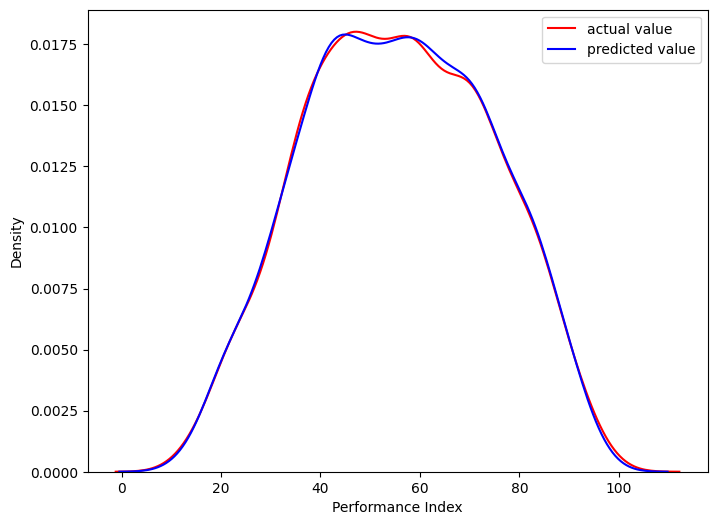

In [37]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_poly, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

In [38]:
mse_poly = mean_squared_error(y_test, yhat_poly)
r2_poly = r2_score(y_test, yhat_poly)
print(f"MSE = {mse_poly}, r2 = {r2_poly}")

MSE = 4.1520884677471095, r2 = 0.9879335671739093


**KEEPING THE DEGREE 4 AND TESTING THE POLYNOMIAL REGRESSION**

In [39]:
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree = 4)),
    ('model', LinearRegression())
])

pipeline.fit(x_train, y_train)
yhat_poly = pipeline.predict(x_test)

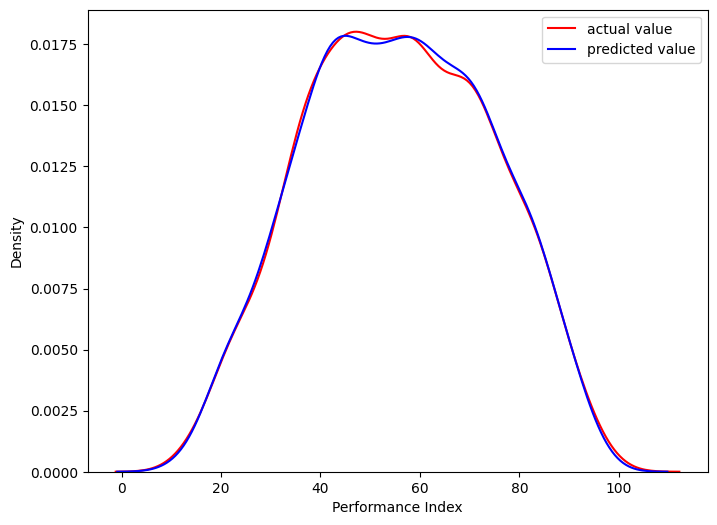

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_poly, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

In [41]:
mse_poly = mean_squared_error(y_test, yhat_poly)
r2_poly = r2_score(y_test, yhat_poly)
print(f"MSE = {mse_poly}, r2 = {r2_poly}")

MSE = 4.205537548475731, r2 = 0.9877782381756863


**USING 1 PREDICTOR FOR POLYNOMIAL REGRESSION**

In [42]:
X = data[['Previous Scores']]

X.head()


,Previous Scores
0,99
1,82
2,51
3,52
4,75


In [43]:
y = data["Performance Index"]
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numerical_columns = ['Previous Scores']
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numerical_columns)
    ],
    remainder='drop'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
])


pipeline.fit(x_train, y_train)
yhat_poly = pipeline.predict(x_test)

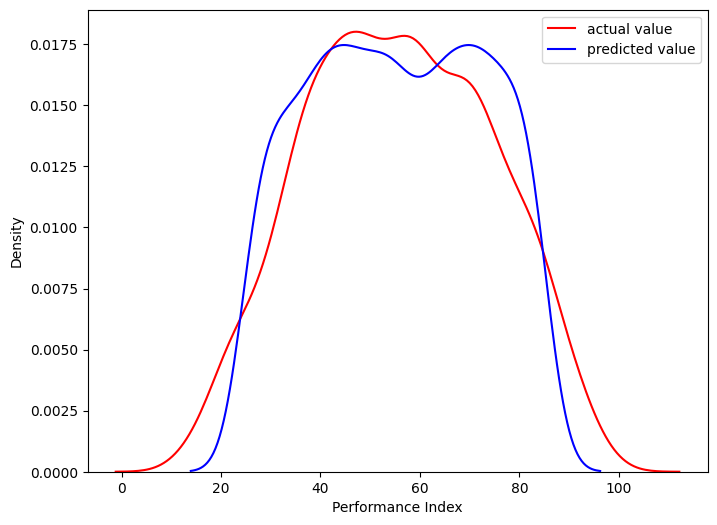

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_poly, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

using one predictor clearly affected the accuracy of the output.

 **using different random state and test size **

In [54]:
X = data.drop("Performance Index", axis = 1)
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


In [55]:
y = data["Performance Index"]
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [57]:

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns),
        ('scale', StandardScaler(), numerical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [58]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  Index(['Extracurricular Activities'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [59]:
yhat_mlr = pipeline.predict(x_test)

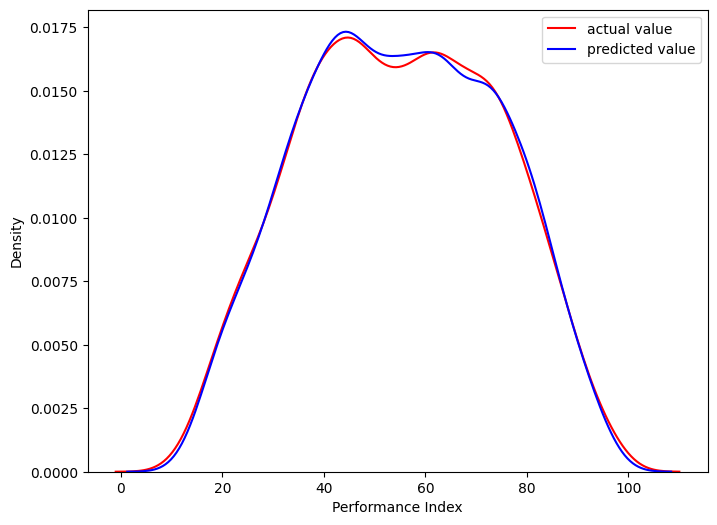

In [60]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_mlr, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_mlr = mean_squared_error(y_test, yhat_mlr)
r2_mlr = r2_score(y_test, yhat_mlr)
print(f"MSE = {mse_mlr}, r2 = {r2_mlr}")

MSE = 4.200018212576841, r2 = 0.9887189383218594
